In [179]:
import numpy as np
from annoy import AnnoyIndex
import pickle
import os
import time
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

In [180]:
from tqdm.notebook import tqdm_notebook as tqdm
tqdm.pandas()

In [181]:
# Importing matrix 
track_vec = pickle.load(open(f'/Users/prernamishra/Downloads/track_vec.pkl', 'rb'))
test_user_vec = pickle.load(open(r'/Users/prernamishra/Downloads/val_user_vec.pkl', 'rb'))

In [171]:

f = len(track_vec[0])
t = AnnoyIndex(f, metric='dot')
for i in range(len(track_vec)):
    t.add_item(i, track_vec[i])

t.build(30)

True

In [172]:
def find_nearest_exhaustive(data, queries, k):
    if len(data.shape) == 1:
        data = np.array([x for x in data])
    n_items = data.shape[0]
    n_feat = data.shape[1]
    n_queries = len(queries)
    
    def single_query(query):
        start = time.time()
        if type(query) is not np.ndarray:
            query = np.array(query)
        res = np.argsort(-data.dot(query))[:k]
        interval = time.time() - start
        return interval, res
    times = []
    results = []
    for i in tqdm(range(n_queries)):
        interval, res = single_query(queries[i])
        times.append(interval)
        results.append(res)
    mean_time = sum(times) / len(times)
    print('-' * 26)
    print('Exhaustive Brute-force Search\n')
    print('Mean Query Search: %.6f' % mean_time)
    
    return mean_time, results

In [173]:
bf_mean_time, bf_results = find_nearest_exhaustive(track_vec, test_user_vec, 500)


--------------------------
Exhaustive Brute-force Search

Mean Query Search: 0.004748


In [174]:

def wrap_with(obj, method, mapping):
    '''
    obj: the model that can respond to the query
    method: the name of the query method
    mapping: what input be mapped
    '''
    get_map = lambda x: [x[mapping[i]] for i in range(len(mapping))]
    def wrapped(*args, **kwrds):
        return obj.__getattribute__(method)(*get_map(args))
    return wrapped

In [175]:
def find_nearest_algo(data, queries, true_label, model_wrapped, k, extra_para):
    if len(data.shape) == 1:
        data = np.array([x for x in data])
    n_items = data.shape[0]
    n_feat = data.shape[1]
    n_queries = len(queries)
    def single_query(query):
        start = time.time()
        res = model_wrapped(query, k, extra_para)
        interval = time.time() - start
        return interval, res
    def get_recall(predict, truth):
        return len([x for x in predict if x in truth]) / len(truth)
    times = []
    recalls = []
    for i in tqdm(range(n_queries)):
        interval, res = single_query(queries[i])
        recall = get_recall(res, true_label[i])
        times.append(interval)
        recalls.append(recall)
    mean_time = sum(times) / len(times)
    mean_recall = sum(recalls) / len(recalls)
    print('-' * 26)
    print('Algorithm with k\' = %d\n' % k)
    print('Mean Query Search Time: %.6f' % mean_time)
    print('Mean Recall: %.6f' % mean_recall)
    
    return mean_time, mean_recall

In [176]:
def unbuild(self):
        """
        Allows to add new items after a tree has been build
        """
        return super(AnnoyIndex, self).unbuild()

In [177]:
def make_plot(tree_list):
    results = []
    
    for tree in tqdm(tree_list):
        res = {'tree': tree}
        #t.unbuild()
        #t.build(tree)
        #t.save('test.tree')
        
        annoy10_wrapped = wrap_with(t, 'get_nns_by_vector', [0, 1, 2])
        num_query_list = []
        recall_list = []
        for para in [100, 500, 1000, 5000, 10000, 50000, 100000, 500000]:
            algo100_time, algo100_recall = find_nearest_algo(track_vec, test_user_vec, bf_results, annoy10_wrapped, 500, para)
            num_query_list.append(1/algo100_time)
            recall_list.append(algo100_recall)
        plt.plot(recall_list, num_query_list, label = 'Annoy (num_tree = {})'.format(tree))
        plt.ylabel('Queries per second (1/s)')
        plt.xlabel('Recall')
        plt.title('Recall-Queries per second (1/s) tradeoff - up and to the right is better')
        plt.yscale('log')
        plt.legend()
        plt.grid()
        res['recall'] = recall_list
        res['time'] = num_query_list
        results.append(res)
    return results


--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.001193
Mean Recall: 0.078857



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000540
Mean Recall: 0.216762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000516
Mean Recall: 0.307619



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.002142
Mean Recall: 0.471048



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.001734
Mean Recall: 0.568286



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.010326
Mean Recall: 0.662476



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.008778
Mean Recall: 0.682762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.045166
Mean Recall: 0.999810



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000820
Mean Recall: 0.078857



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000505
Mean Recall: 0.216762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000867
Mean Recall: 0.307619



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.001530
Mean Recall: 0.471048



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.002325
Mean Recall: 0.568286



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.010096
Mean Recall: 0.662476



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.009123
Mean Recall: 0.682762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.035317
Mean Recall: 0.999810



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000254
Mean Recall: 0.078857



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000565
Mean Recall: 0.216762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000274
Mean Recall: 0.307619



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.002412
Mean Recall: 0.471048



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.002624
Mean Recall: 0.568286



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.005271
Mean Recall: 0.662476



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.010729
Mean Recall: 0.682762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.041571
Mean Recall: 0.999810



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000105
Mean Recall: 0.078857



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000160
Mean Recall: 0.216762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000472
Mean Recall: 0.307619



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.000770
Mean Recall: 0.471048



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.001413
Mean Recall: 0.568286



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.003704
Mean Recall: 0.662476



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.006626
Mean Recall: 0.682762



--------------------------
Algorithm with k' = 500

Mean Query Search Time: 0.029159
Mean Recall: 0.999810



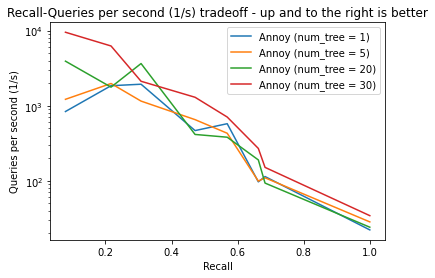

In [178]:
tree_list = [1, 5,20,30]
plot_data_try = make_plot(tree_list)